In [1]:
import APEX as ap
import pyccl as ccl
import numpy as np

cosmo = ccl.Cosmology(
    Omega_c=0.261,
    Omega_b=0.049,
    h=0.677,
    n_s=0.9665,
    sigma8=0.8102,
    transfer_function="bbks",
    matter_power_spectrum="halofit")


In [17]:
gdwsp = ap.GalaxyDensityTracerWorkspace(
    sacc_file="/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_red_x_cib(857).fits",
    tracer_name_root="hsc_red_zbin",
    max_index=3,
    cosmology=cosmo
)

cibwsp = ap.CIBIntensityTracerWorkspace(
    flux_fits_file="../CIB-Project/filtered_snu_planck.fits",
    cosmology=cosmo,
    tracer_name_root="CIBLenz__",
    single_index=3
)

tracer_combos = [('hsc_red_zbin0', 'hsc_red_zbin0'),
                 ('hsc_red_zbin1', 'hsc_red_zbin1'),
                 ('hsc_red_zbin2', 'hsc_red_zbin2'),
                 ('hsc_red_zbin3', 'hsc_red_zbin3'),

                 ('hsc_red_zbin0', 'CIBLenz__3'),
               
                 ('hsc_red_zbin1', 'CIBLenz__3'),
                 
                 ('hsc_red_zbin2', 'CIBLenz__3'),
              
                 ('hsc_red_zbin3', 'CIBLenz__3')
                 ]

s = ap.SaccWorkspace('/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_red_x_cib(857).fits', tracer_combinations=tracer_combos)

s.define_alias('cib_857GHz', 'CIBLenz__3')



{'CIBLenz__3': 'cib_857GHz'}


In [18]:
mmodel = ap.MaleubreModel(
    Tracer1Workspace=gdwsp,
    Tracer2Workspace=cibwsp,
    tracer_combos=tracer_combos,
    sacc_workspace=s,
    cosmology=cosmo,
    logged_N=True,
    min_ell=100,
    max_ell=1000
)

In [19]:
mcmc = ap.MCMCWorkspace(
    sacc_file='/home/nathand/Documents/AstroCode/CIB-Project/NEW-hsc_red_x_cib(857).fits',
    model=mmodel,
    likelihood_function='log_likelihood_function',

)

params = ['b_g0', 'b_g1', 'b_g2', 'b_g3',
          'N_gg0', 'N_gg1', 'N_gg2', 'N_gg3',
          'A_gg0', 'A_gg1', 'A_gg2', 'A_gg3',
          'N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3',
          'A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3',
          'bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']

mcmc.set_param_priors(
    params=params,
    priors=[
        (0.75, 5), (0.75, 5), (0.75, 5), (0.75, 5), 
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), (np.log10(1e-15), np.log10(1)), 
        (-100, 100), (-100, 100), (-100, 100), (-100, 100),
        (-3, 3), (-3, 3), (-3, 3), (-3, 3),
    ]
)

mcmc.set_param_references(
    params=params,
    references=[
        1.1, 1.1, 1.1, 1.1, 
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), np.log10(1.7e-9), 
        7, 7, 7, 7,
        0.5, 0.5, 0.5, 0.5,
    ]
)

mcmc.set_param_proposals(
    params=params,
    proposals=[
        0.1, 0.1, 0.1, 0.1, 
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        np.log10(1e-9), np.log10(1e-9), np.log10(1e-9), np.log10(1e-9),
        1, 1, 1, 1,
        0.1, 0.1, 0.1, 0.1,
    ]
)

mcmc.set_grouped_params({
    'b_gs': ['b_g0', 'b_g1', 'b_g2', 'b_g3'],
    'N_ggs': ['N_gg0', 'N_gg1', 'N_gg2', 'N_gg3'],
    'A_ggs': ['A_gg0', 'A_gg1', 'A_gg2', 'A_gg3'],
    'N_gnus': ['N_gnu0', 'N_gnu1', 'N_gnu2', 'N_gnu3'],
    'A_gnus': ['A_gnu0', 'A_gnu1', 'A_gnu2', 'A_gnu3'],    
    'bpsfrs': ['bpsfr0', 'bpsfr1', 'bpsfr2', 'bpsfr3']
})

mcmc.MCMC_config(params, sampler_info={'minimize': {'seed':42}})

mcmc.minimize_run()



[<bound method maleubremodel.log_likelihood_function of <apex.maleubremodel object at 0x7f2d1858e490>>] Initialized external likelihood.
[minimize] *WARNING* This run has been SEEDED with seed 42
[minimize] Initializing
[minimize] Run 1/2 will start from random initial point:
[minimize] {'b_g0': np.float64(1.1), 'b_g1': np.float64(1.1), 'b_g2': np.float64(1.1), 'b_g3': np.float64(1.1), 'N_gg0': np.float64(-8.769551078621726), 'N_gg1': np.float64(-8.769551078621726), 'N_gg2': np.float64(-8.769551078621726), 'N_gg3': np.float64(-8.769551078621726), 'A_gg0': np.float64(7.0), 'A_gg1': np.float64(7.0), 'A_gg2': np.float64(7.0), 'A_gg3': np.float64(7.0), 'N_gnu0': np.float64(-8.769551078621726), 'N_gnu1': np.float64(-8.769551078621726), 'N_gnu2': np.float64(-8.769551078621726), 'N_gnu3': np.float64(-8.769551078621726), 'A_gnu0': np.float64(7.0), 'A_gnu1': np.float64(7.0), 'A_gnu2': np.float64(7.0), 'A_gnu3': np.float64(7.0), 'bpsfr0': np.float64(0.5), 'bpsfr1': np.float64(0.5), 'bpsfr2': np.

minimize

In [10]:
modelled = mmodel.get_modelled_data(
    b_gs=np.array([1.026233, 1.110347, 1.283814, 1.712013]),
    N_ggs=np.array([-1.133652, -11.48665, -13.596588, 0.0]),
    A_ggs=np.array([6.730881, 9.768008, 14.413288, 20.77723]),
    N_gnus=np.array([-9.854039, -10.313947, -6.445401, -11.724567]),
    A_gnus=np.array([0.044721, 0.564958, 1.918577, 2.340896]),
    bpsfrs=np.array([0.024786, 0.065707, 0.146565, 0.274339]),
    full_ells=True
)

{'hsc_zbin0': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0   0xd08af85e3a95b1   0x60e90c7510ea250a    0       0    , 'hsc_zbin1': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xf97ff538bc150b04  0x60e90c7510ea250a    0       0    , 'hsc_zbin2': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x63e5db22383ab328  0x60e90c7510ea250a    0       0    , 'hsc_zbin3': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x6b82ec40142804a   0x60e90c7510ea250a    0       0    , 'CIBLenz__3': <pyccl.tracers.Tracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xb71a347c2c259fa4         None           0       0    }
BOO Getting C_ell for tracer hsc_zbin0 and hsc_zbin0
Using full ells for tracer combination hsc_zbin0 and hsc_zbin0
BOO Getting C_ell for tracer hsc_zbin1 and hsc_zbin1
Using full ells for tracer

In [13]:
# blue HSC map

modelled = mmodel.get_modelled_data(
    b_gs=np.array([1.026474, 1.104951, 1.29494, 1.661452]),
    N_ggs=np.array([-6.84985, -3.740814, -10.887948, -10.108594]),
    A_ggs=np.array([6.667355, 10.031404, 13.381839, 28.142617]),
    N_gnus=np.array([-2.612602, -9.204992, -9.261518, -15.0]),
    A_gnus=np.array([0.054902, 0.66334, 2.125307, 3.001524]),
    bpsfrs=np.array([0.023057, 0.061194, 0.139908, 0.269063]),
    full_ells=True
)

{'hsc_zbin0': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0   0xd08af85e3a95b1   0x60e90c7510ea250a    0       0    , 'hsc_zbin1': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xf97ff538bc150b04  0x60e90c7510ea250a    0       0    , 'hsc_zbin2': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x63e5db22383ab328  0x60e90c7510ea250a    0       0    , 'hsc_zbin3': <pyccl.tracers.NzTracer>
	num       kernel             transfer       prefac  bessel 
	 0  0x6b82ec40142804a   0x60e90c7510ea250a    0       0    , 'CIBLenz__3': <pyccl.tracers.Tracer>
	num       kernel             transfer       prefac  bessel 
	 0  0xb71a347c2c259fa4         None           0       0    }
BOO Getting C_ell for tracer hsc_zbin0 and hsc_zbin0
Using full ells for tracer combination hsc_zbin0 and hsc_zbin0
BOO Getting C_ell for tracer hsc_zbin1 and hsc_zbin1
Using full ells for tracer

In [11]:

measured_data = s.get_c_ells(tracer_combos)

errors = s.get_errors(tracer_combos)

print()


Getting C_ell for tracer combination hsc_zbin0 and hsc_zbin0
Getting C_ell for tracer combination hsc_zbin1 and hsc_zbin1
Getting C_ell for tracer combination hsc_zbin2 and hsc_zbin2
Getting C_ell for tracer combination hsc_zbin3 and hsc_zbin3
Getting C_ell for tracer combination hsc_zbin0 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin1 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin2 and cib_857GHz
Getting C_ell for tracer combination hsc_zbin3 and cib_857GHz



3
[3.66059371e-06 1.12339025e-06 4.74717739e-08]
[1.46832934e-07]
[5.34955260e-07 9.05023321e-08]
[3.51126525e-06 6.72434399e-08]
3


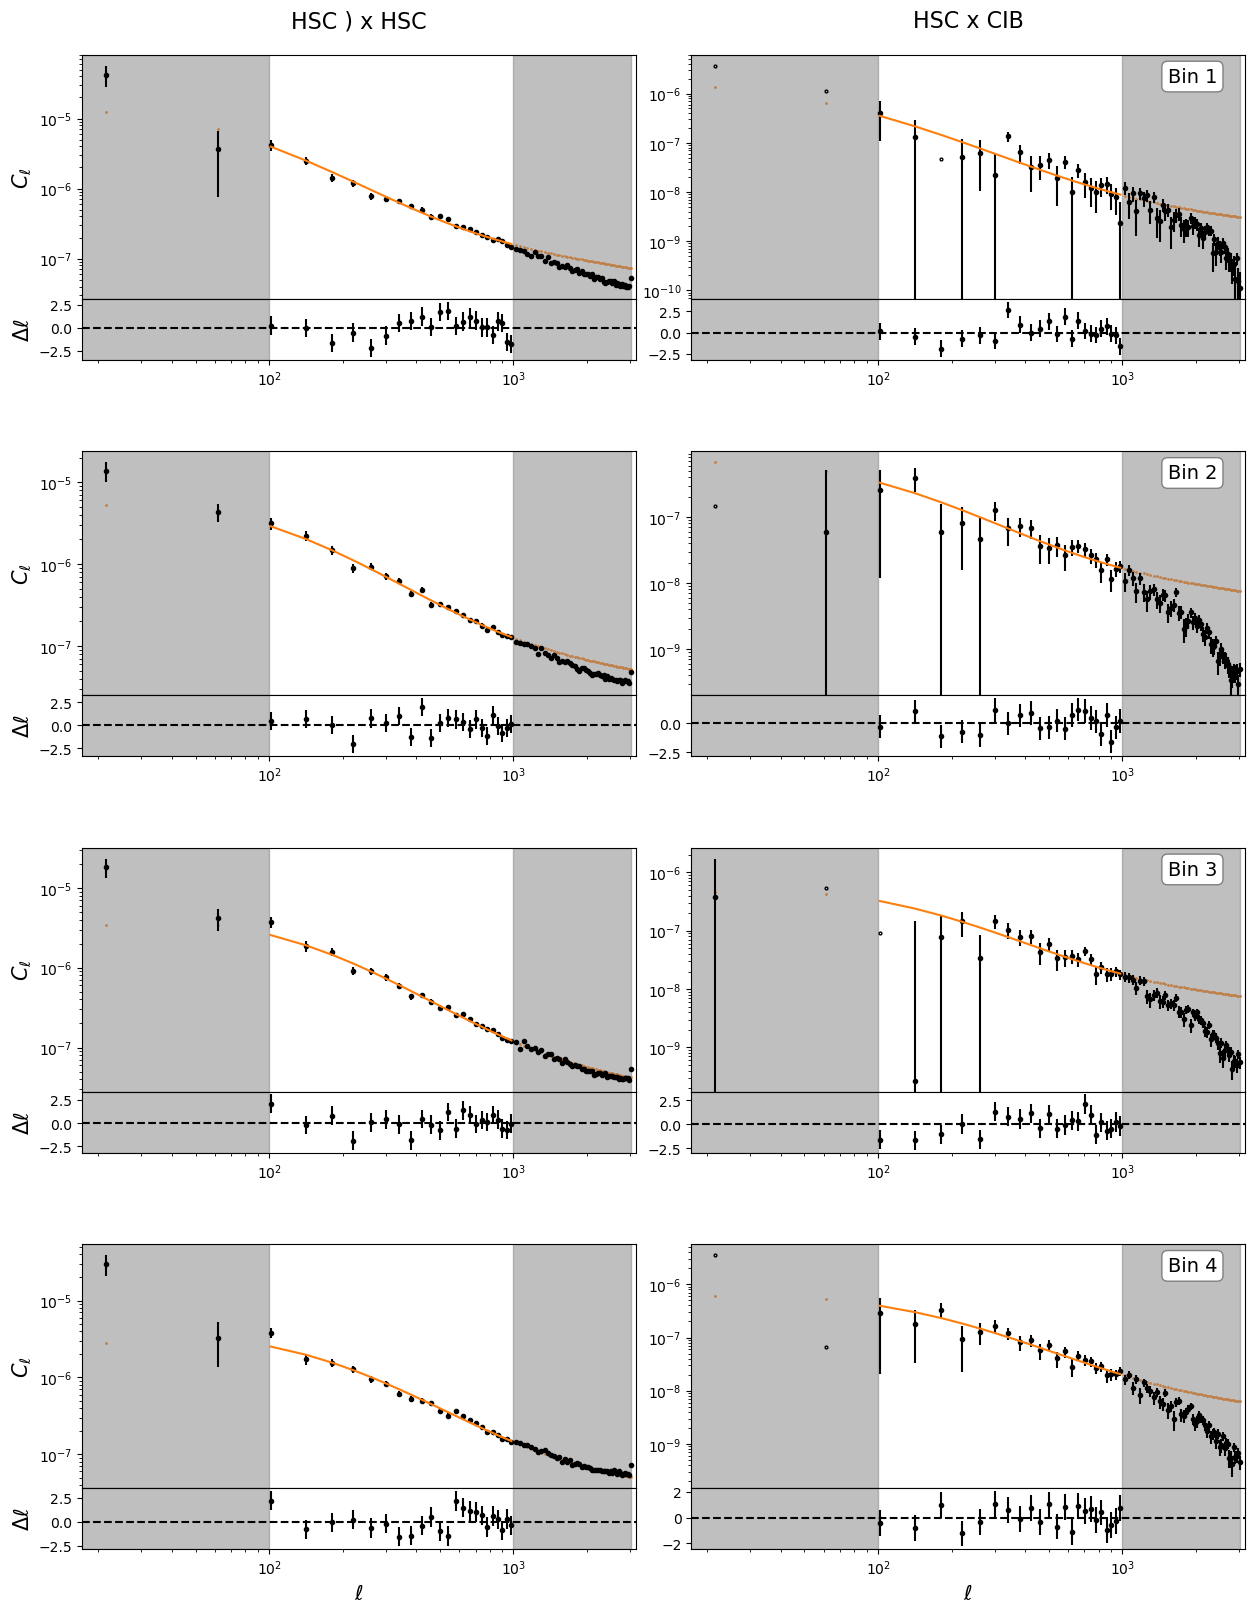

In [14]:
plotter = ap.Plots(s)

plotter.create_grid_plot(
    subplot_titles=['HSC ) x HSC', 'HSC x CIB'],
    subplot_tracer_combos=tracer_combos,
    measured_data=measured_data,
    measured_data_err=errors,
    modelled_data=modelled,
    cut_positions=[100, 1000],
    residuals=True,
    full_ells=True
)